In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
from scipy.stats import norm

In [15]:
# make nice figures
# Make inline plots vector graphics
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath} \usepackage{xcolor}"

# Three different Exponential Families: Normal, Beta, Gamma

In [2]:
from scipy.stats import norm, beta, gamma

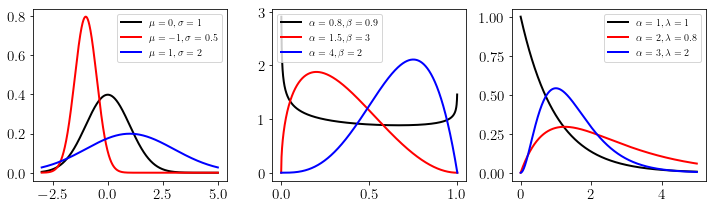

In [3]:

# parameters for the normal

mu1, sigma1 = 0,1
mu2, sigma2 = -1,0.5
mu3, sigma3 = 1,2
x_normal = np.linspace(-3,5, 1000+1)
normal1_pdf = norm.pdf(x_normal, mu1, sigma1)
normal2_pdf = norm.pdf(x_normal, mu2, sigma2)
normal3_pdf = norm.pdf(x_normal, mu3, sigma3)

# parameters for the beta
a1, b1 = 0.8, 0.9
a2, b2 = 1.5, 3
a3, b3 = 4, 2
x_beta = np.linspace(0,1,1000+1)
beta1_pdf = beta.pdf(x_beta, a1, b1)
beta2_pdf = beta.pdf(x_beta, a2, b2)
beta3_pdf = beta.pdf(x_beta, a3, b3)

# parameters for the gamma
a1_g, l1 = 1,1
a2_g, l2 = 2,0.8
a3_g, l3 = 3, 2
x_gamma = np.linspace(0, 5, 1000+1)
gamma1_pdf = gamma.pdf(x_gamma, a1_g, scale=1/l1)
gamma2_pdf = gamma.pdf(x_gamma, a2_g, scale=1/l2)
gamma3_pdf = gamma.pdf(x_gamma, a3_g, scale=1/l3)


plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)


#plot them 
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

#hyperparameters
lw=2

#normal 
ax[0].plot(x_normal, normal1_pdf, color='black', lw=lw, label=r'$\mu={}, \sigma={}$'.format(mu1, sigma1))
ax[0].plot(x_normal, normal2_pdf, color='red', lw=lw, label=r'$\mu={}, \sigma={}$'.format(mu2, sigma2))
ax[0].plot(x_normal, normal3_pdf, color='blue', lw=lw, label=r'$\mu={}, \sigma={}$'.format(mu3, sigma3))
ax[0].legend()

ax[1].plot(x_beta, beta1_pdf, color='black', lw=lw, label=r'$\alpha={}, \beta={}$'.format(a1,b1))
ax[1].plot(x_beta, beta2_pdf, color='red', lw=lw, label=r'$\alpha={}, \beta={}$'.format(a2,b2))
ax[1].plot(x_beta, beta3_pdf, color='blue', lw=lw, label=r'$\alpha={}, \beta={}$'.format(a3,b3))
ax[1].legend()

ax[2].plot(x_gamma, gamma1_pdf, color='black', lw=lw, label=r'$\alpha={}, \lambda={}$'.format(a1_g,l1))
ax[2].plot(x_gamma, gamma2_pdf, color='red', lw=lw, label=r'$\alpha={}, \lambda={}$'.format(a2_g,l2))
ax[2].plot(x_gamma, gamma3_pdf, color='blue', lw=lw, label=r'$\alpha={}, \lambda={}$'.format(a3_g,l3))
ax[2].legend()

plt.tight_layout()
plt.savefig('normal_beta_gamma.png')
plt.plot();

# Visualizing the main components of ExpFams

### Visualizing the sufficient statistics

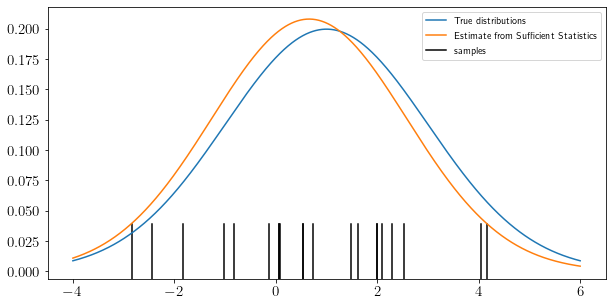

In [4]:
np.random.seed(42)
n = 20
norm_samples = norm.rvs(mu3, sigma3, n)
x_ = np.linspace(-4,6, 1000+1)

Y1 = np.sum(norm_samples)
Y2 = np.sum(norm_samples**2)
M = 1/n * Y1
S = (Y2 - (Y1**2/n))/(n-1)

norm_true_pdf = norm.pdf(x_, mu3, sigma3)
norm_approx_pdf = norm.pdf(x_, M, np.sqrt(S))

plt.figure(figsize=(10, 5))
for s in norm_samples:
    plt.axvline(s, 0, 0.2, color='black')
plt.plot(x_, norm_true_pdf, label='True distributions')
plt.plot(x_, norm_approx_pdf, label='Estimate from Sufficient Statistics')
plt.axvline(norm_samples[0], 0, 0.2, color='black', label='samples')
plt.legend()

plt.savefig('suff_stats_normal.png')
plt.plot();

### Visualizing the natural parameters

In [5]:
# TODO how? -> didn't find a good way yet

### Visualizing the log partition function 

In [6]:
from scipy.special import gamma as gamma_func
def gamma_pdf(x, a, l):
    r = l**a/gamma_func(a) * (x ** (a-1)) * (np.exp(-x*l))
    return(r)

def gamma_pdf_no_partition(x, a, l):
    r = (x ** (a-1)) * (np.exp(-x*l))
    return(r)

def gamma_partition(a, l):
    return(l**a/gamma_func(a))

def gamma_partition_log(a, l):
    return(np.log(gamma_partition(a,l)))

def gamma_mean(a, l):
    return(a/l)

def gamma_var(a, l):
    return(a/l**2)

0.6400000000000001


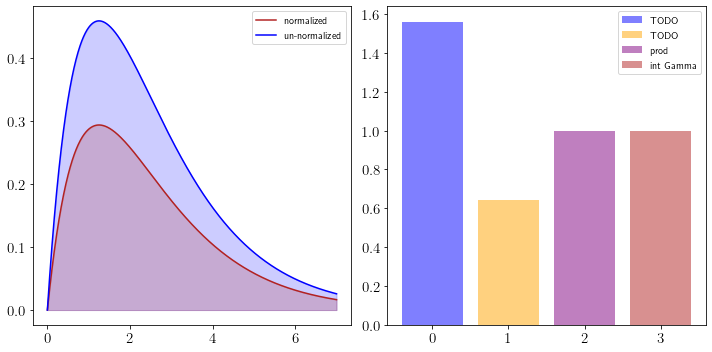

In [7]:
x_ = np.linspace(0, 7, 1000+1)
gamma_test = gamma_pdf(x_, a2_g, l2)
gamma_test_no_partition = gamma_pdf_no_partition(x_, a2_g, l2)
gamma_partition_test = gamma_partition(a2_g, l2)
print(gamma_partition_test)

from scipy.integrate import quad

def gamma_unnormalized(x):
    return(gamma_pdf_no_partition(x, a2_g, l2))

def gamma_int(x):
    return(gamma_pdf(x, a2_g, l2))
    
int_gamma_unnormalized, _ = quad(gamma_unnormalized, 0, 1000)
int_gamma, _ = quad(gamma_int, 0, 1000)

fix, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(x_, gamma_test, label="normalized", color='firebrick')
ax[0].plot(x_, gamma_test_no_partition, label="un-normalized", color='blue')
ax[0].fill_between(x_, np.zeros(len(x_)), gamma_test_no_partition, color='blue', alpha=0.2)
ax[0].fill_between(x_, np.zeros(len(x_)), gamma_test, color='firebrick', alpha=0.2)
ax[0].legend()

ax[1].bar(0, int_gamma_unnormalized, label='TODO', color='blue', alpha=0.5)
ax[1].bar(1, gamma_partition_test, label='TODO', color='orange', alpha=0.5) 
ax[1].bar(2, int_gamma_unnormalized * gamma_partition_test, label='prod', color='purple', alpha=0.5)
ax[1].bar(3, int_gamma, label='int Gamma', color='firebrick', alpha=0.5)
ax[1].legend()

plt.tight_layout()
plt.savefig('log_partition_gamma.png')
plt.show();

In [8]:
as_ = np.linspace(0.5, 10, 100)
bs_ = np.linspace(0.5, 10, 100)

gamma_partition_2D = np.zeros((100, 100))
gamma_partition_2D_log = np.zeros((100, 100))
gamma_partition_2D_mean = np.zeros((100, 100))
gamma_partition_2D_var = np.zeros((100, 100))
for i, a in enumerate(as_):
    for j, b in enumerate(bs_):
        v = gamma_partition(a, b)
        v_log = gamma_partition_log(a, b)
        v_mean = gamma_mean(a, b)
        v_var = gamma_var(a, b)
        gamma_partition_2D[i,j] = v
        gamma_partition_2D_log[i,j] = v_log
        gamma_partition_2D_mean[i,j] = v_mean
        gamma_partition_2D_var[i,j] = v_var
        
        

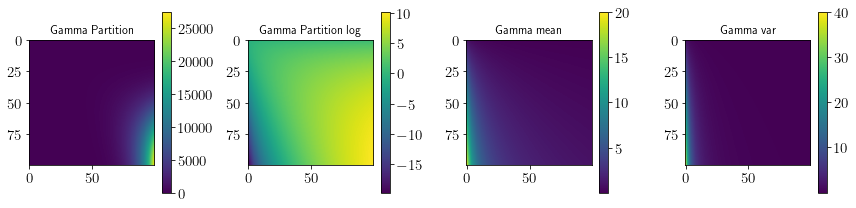

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

im0 = ax[0].imshow(gamma_partition_2D)
plt.colorbar(im0, ax=ax[0])
ax[0].set_title('Gamma Partition')

im1 = ax[1].imshow(gamma_partition_2D_log)
plt.colorbar(im1, ax=ax[1])
ax[1].set_title('Gamma Partition log')

im2 = ax[2].imshow(gamma_partition_2D_mean)
plt.colorbar(im2, ax=ax[2])
ax[2].set_title('Gamma mean')

im3 = ax[3].imshow(gamma_partition_2D_var)
plt.colorbar(im3, ax=ax[3])
ax[3].set_title('Gamma var')


plt.tight_layout()
plt.show();

# product and division of exp fam

In [10]:
from scipy.special import beta as beta_func

def beta_pdf(x, a, b):
    nom = x ** (a-1) * (1 - x) ** (b-1)
    denom = beta_func(a, b)
    return(nom/denom)

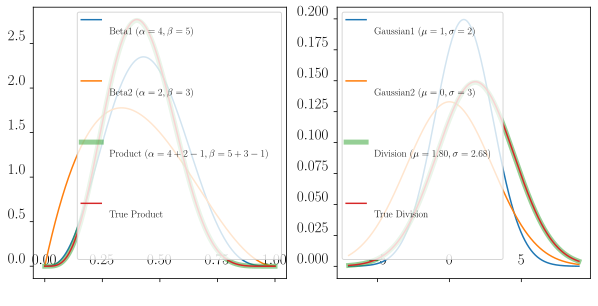

In [16]:
a1, b1 = 4, 5
a2, b2 = 2, 3
a_prod, b_prod = a1 + a2-1, b1 + b2-1

x_ = np.linspace(0,1, 1000+1)
beta1_pdf = beta_pdf(x_, a1, b1)
beta2_pdf = beta_pdf(x_, a2, b2)
beta_prod_pdf = beta_pdf(x_, a_prod, b_prod)
beta_prod_true_pdf = 0.69*beta1_pdf * beta2_pdf

m1, s1 = 1,2
m2, s2 = 0,3
s_div = 1/np.sqrt((1/s1**2 - 1/s2**2))
m_div = (m1*s2**2  - m2*s1**2)/(s1 + s2)


x_n = np.linspace(-7, 9, 1000+1)
norm1_pdf = norm.pdf(x_n, m1, s1)
norm2_pdf = norm.pdf(x_n, m2, s2)
norm_div_pdf = norm.pdf(x_n, m_div, s_div)
norm_div_true_pdf = 0.09*norm1_pdf/norm2_pdf


fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(x_, beta1_pdf, label=r'Beta1 $(\alpha={}, \beta={})$'.format(a1, b1))
ax[0].plot(x_, beta2_pdf, label=r'Beta2 $(\alpha={}, \beta={})$'.format(a2, b2))
ax[0].plot(x_, beta_prod_pdf, label=r'Product $(\alpha={}+{}-1, \beta={}+{}-1)$'.format(a1,a2,b1,b2), alpha=0.5, lw=5)
ax[0].plot(x_, beta_prod_true_pdf, label='True Product')
ax[0].legend()

ax[1].plot(x_n, norm1_pdf, label=r'Gaussian1 $(\mu={}, \sigma={})$'.format(m1, s1))
ax[1].plot(x_n, norm2_pdf, label=r'Gaussian2 $(\mu={}, \sigma={})$'.format(m2, s2))
ax[1].plot(x_n, norm_div_pdf, alpha=0.5, lw=5, label=r'Division $(\mu={:.02f}, \sigma={:.02f})$'.format(m_div, s_div))
ax[1].plot(x_n, norm_div_true_pdf, label='True Division')
ax[1].legend()

plt.savefig('beta_normal_mult_div.png')
plt.show();

# Moments of Exp Fams: example of the Gamma distribution

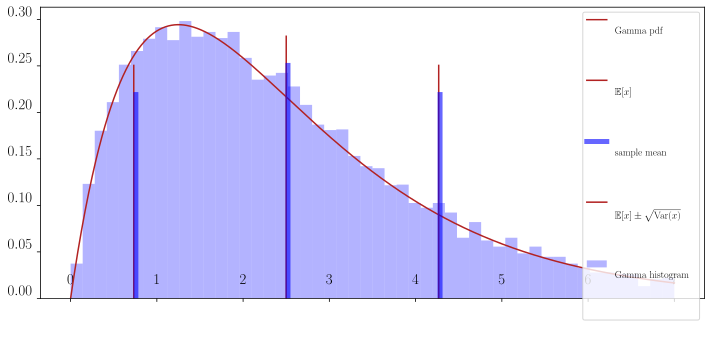

In [17]:
from scipy.stats import gamma

x_ = np.linspace(0, 7, 1000+1)

gamma_samples = gamma.rvs(a2_g, scale=1/l2, size=10000)
gamma_pdf_moments = gamma_pdf(x_, a2_g, l2)

gamma_mean = a2_g/l2
gamma_var = a2_g/l2**2

gamma_mean_samples = np.mean(gamma_samples)
gamma_var_samples = np.var(gamma_samples)

plt.figure(figsize=(10, 5))
plt.plot(x_, gamma_pdf_moments, color='firebrick', label='Gamma pdf')
plt.hist(gamma_samples, color='blue', alpha=0.3, range=[0, 7], density=True, bins=50, label='Gamma histogram')
plt.axvline(gamma_mean, 0, 0.9, color='firebrick', label=r'$\mathbb{E}[x]$')
plt.axvline(gamma_mean_samples, 0, 0.8, lw=5, alpha=0.6, color='blue', label='sample mean')
plt.axvline(gamma_mean - np.sqrt(gamma_var), 0, 0.8, color='firebrick', label=r'$\mathbb{E}[x] \pm \sqrt{\mathrm{Var}(x)}$')
plt.axvline(gamma_mean + np.sqrt(gamma_var), 0, 0.8, color='firebrick')
plt.axvline(gamma_mean_samples - np.sqrt(gamma_var_samples), 0, 0.7, color='blue', lw=5, alpha=0.6)
plt.axvline(gamma_mean_samples + np.sqrt(gamma_var_samples), 0, 0.7, color='blue', lw=5, alpha=0.6)
plt.legend()

plt.tight_layout()
plt.savefig('gamma_expectations.png')
plt.show();

# Moment Matching of Exp Fams

16.0 4.0


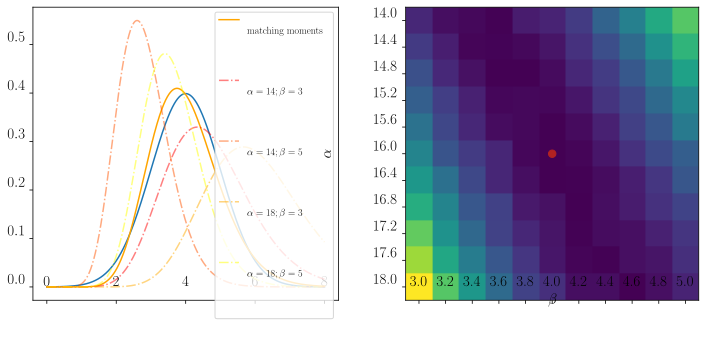

In [23]:
# start with a normal distribution
from matplotlib import cm

np.random.seed(1)

x_ = np.linspace(0, 8, 1000+1)

m, s = 4, 1
random_norm_pdf = norm.pdf(x_, m, s)
a = m**2 / s**2
b = m / s**2
print(a, b)
random_gamma_pdf = gamma_pdf(x_, a, b)
a_s = [14, 18]
b_s = [3, 5]

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(x_, random_norm_pdf)
ax[0].plot(x_, random_gamma_pdf, color='orange', label='matching moments')

evenly_spaced_interval = np.linspace(0, 1, 4)
colors = [cm.autumn(x) for x in evenly_spaced_interval]

idx = 0
for a_ in a_s:
    for b_ in b_s:
        ax[0].plot(x_, gamma_pdf(x_, a_, b_), '-.', color=colors[idx], alpha=0.5, label=r'$\alpha={}; \beta={}$'.format(a_, b_))
        idx += 1
        
ax[0].legend()

## compute KL divergence 
a_space = np.linspace(a_s[0], a_s[1], 10+1)
b_space = np.linspace(b_s[0], b_s[1], 10+1)
KL_div = np.zeros((11, 11))

def KL_normal_gamma(a, b, m, s):
    p_samples = norm.rvs(m, s, 10000)
    p_samples[p_samples <= 0] =1e-8
    p_ = norm.pdf(p_samples, m, s)
    q_ = gamma_pdf(p_samples, a, b)
    KL_ = np.mean(np.log(p_/q_))
    return(KL_)

for i, a_ in enumerate(a_space):
    for j, b_ in enumerate(b_space):
        KL_div_ = KL_normal_gamma(a_, b_, m, s)
        #print(a_, b_, KL_div_)
        KL_div[i,j] = KL_div_

        
ax[1].imshow(KL_div)
ax[1].set_ylabel(r'$\alpha$')
ax[1].set_xlabel(r'$\beta$')
ax[1].set_yticks(np.arange(len(a_space)))
ax[1].set_xticks(np.arange(len(b_space)))
ax[1].set_yticklabels(a_space)
ax[1].set_xticklabels(b_space)

ax[1].plot(5, 5, '.', markersize=15, color='firebrick')
        
plt.tight_layout()        
plt.savefig('moment_matching_gamma.png')
plt.show();